In [84]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipt
import mxnet as mx
import my_utils as mu
from intonet import *

from RNN.rnn_load import get
from RNN.rnn import rnn_net
params= ('./<9-10:37:15>LSTM[E50]/[ACC-0.45691 E49]', 49)
import pickle as pk
with open('../../DATA/PK/NEW/[T10,N10]<8-11:42:11>.pk','r') as f:
    imgs=pk.load(f)
    ll  =pk.load(f)

from RNN.rnn_iter import RnnIter
val = RnnIter(ll,ll, batch_size=1)
out, img, ll, arg, aux \
    = fetch_internal(rnn_net(begin=mx.sym.Variable(name='data')), val, *params, is_rnn=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

['data', 'rnn_i2h_weight', 'rnn_i2h_bias', 'rnn_i2h_output', 'h', 'rnn_h2h_weight', 'rnn_h2h_bias', 'rnn_h2h_output', '_plus27_output', 'rnn_slice_output0', 'rnn_slice_output1', 'rnn_slice_output2', 'rnn_slice_output3', 'out_gate_output', 'forget_gate_output', 'c', '_mul39_output', 'in_gate_output', 'in_transform_output', '_mul40_output', '_plus28_output', 'tanh2h_output', '_mul41_output', 'pred_weight', 'pred_bias', 'pred_output', 'reshape2_output', 'softmax_label', 'softmax_output'] 

Abandoned: data
Abandoned: rnn_i2h_weight
Abandoned: rnn_i2h_bias
Abandoned: h
Abandoned: rnn_h2h_weight
Abandoned: rnn_h2h_bias
Abandoned: c
Abandoned: pred_weight
Abandoned: pred_bias
Abandoned: softmax_label

Start Predict

Key of outputs
_mul41 (10, 2500) -0.0275097 0.565954
_mul40 (10, 2500) -0.0370194 0.743105
_plus28 (10, 2500) -0.0370194 0.743105
rnn_i2h (10, 10000) 2.75394 3.81534
in_transform (10, 2500) -0

In [121]:
import numpy as np
pp = np.split(out['pred'][0], 10, axis=0)
pp = np.array(pp)
print pp.shape, pp.mean(axis=1).std(axis=0)
intopp = np.split(out['_mul41'][0], 10, axis=0)
intopp = np.array(intopp)
print intopp.shape, intopp.mean(axis=1).std(axis=0)

(10, 65536) 0.85324
(10, 250) 0.0161354


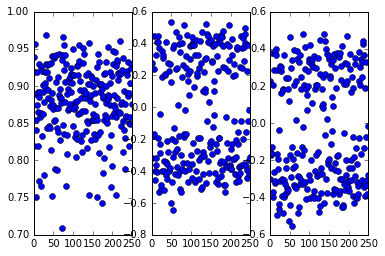

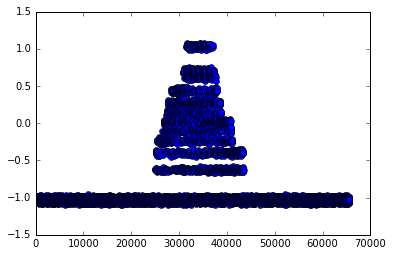

mean and std of pred -1.03092 0.0198624


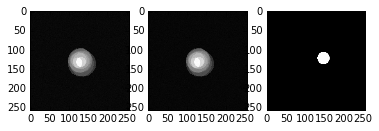

------------ 772.0 | -0.300162


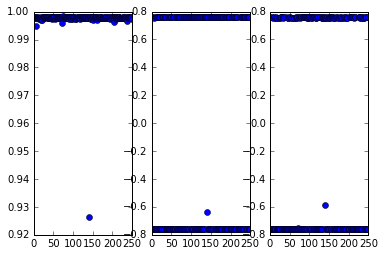

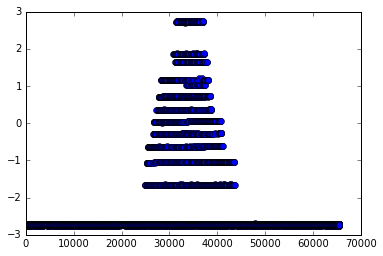

mean and std of pred -1.03231 0.0166302


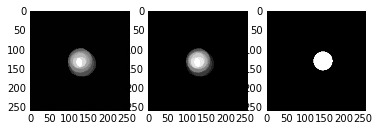

------------ 1910.0 | -0.743747


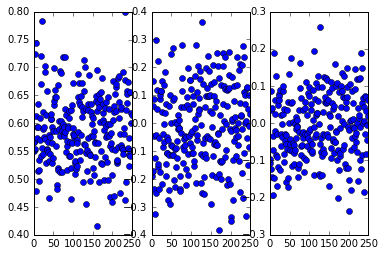

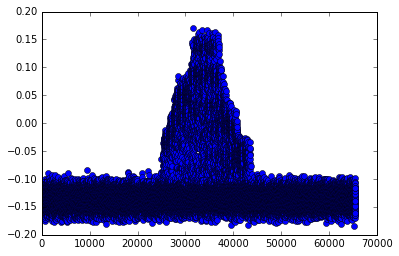

mean and std of pred -1.02764 0.0186056


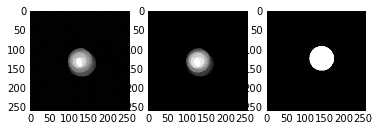

------------ 3179.0 | -0.760451


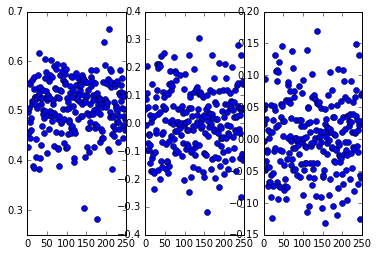

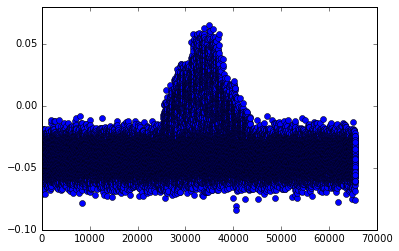

mean and std of pred -1.03064 0.0154784


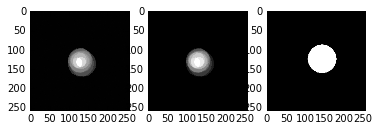

------------ 4252.0 | -0.761105


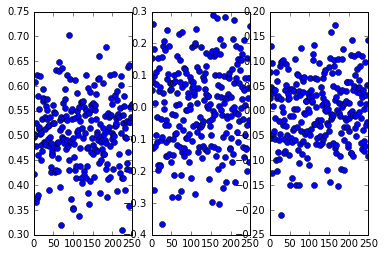

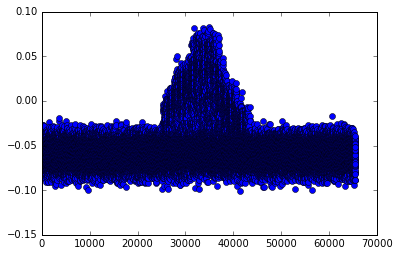

mean and std of pred -1.03119 0.0194476


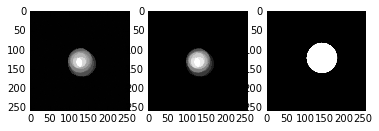

------------ 4863.0 | -0.76107


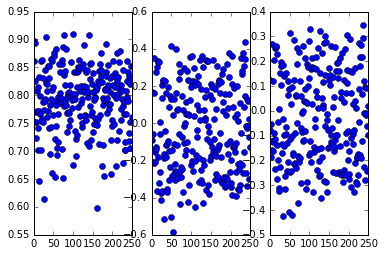

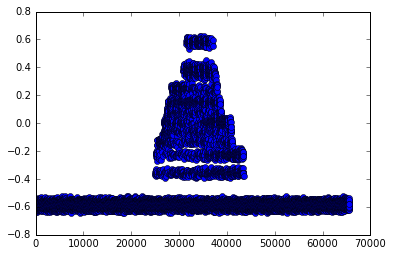

mean and std of pred -1.03065 0.0185783


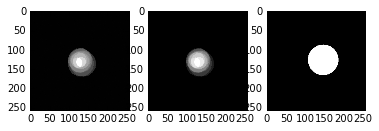

------------ 4865.0 | -0.761281


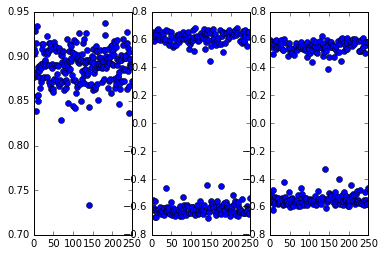

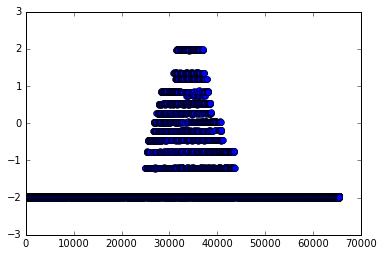

mean and std of pred -1.02979 0.017492


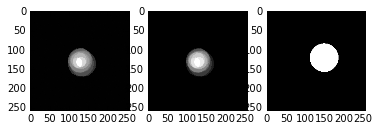

------------ 4252.0 | -0.759707


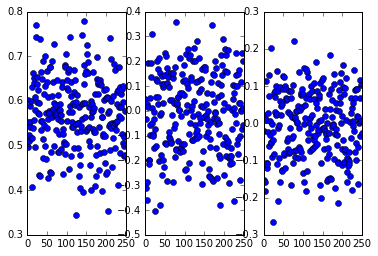

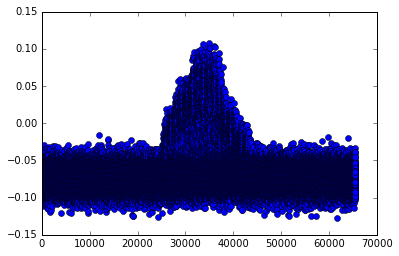

mean and std of pred -1.0315 0.0183668


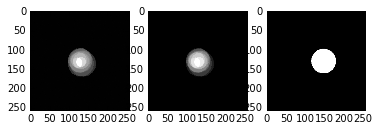

------------ 3173.0 | -0.758193


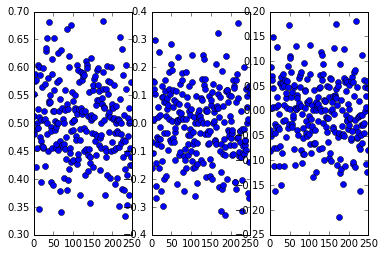

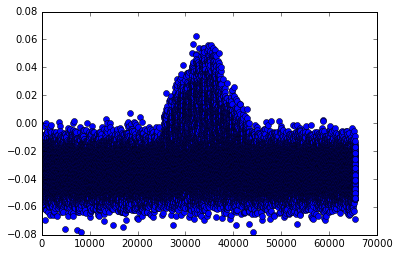

mean and std of pred -1.02923 0.0172762


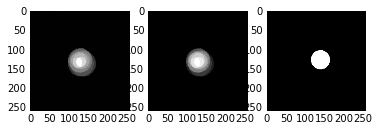

------------ 1907.0 | -0.758837


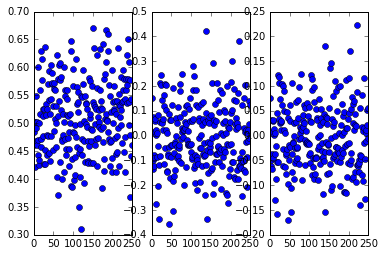

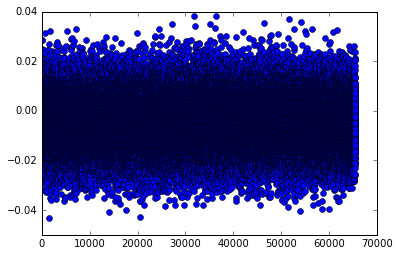

mean and std of pred -1.03188 0.0188738


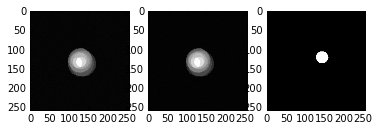

------------ 764.0 | -0.394257


In [122]:
for i in range(10):
    mu.show(out['out_gate'][0,250*i:250*(i+1)], out['tanh2h'][0,250*i:250*(i+1)], \
            out['_mul41'][0,250*i:250*(i+1)], f=['plot','plot','plot'])
    mu.show(out['pred'][0,65536*i:65536*(i+1)], f=['plot'])
    print 'mean and std of pred', out['pred'][0,250*i:250*(i+1)].mean(), out['pred'][0,250*i:250*(i+1)].std()
    mu.show(out['reshape2'][i,0], out['softmax'][i,0], img[i,0])
    print '------------', ll[i,0].sum(), '|', pred[i,0].mean()